In [ ]:
import numpy as np 
from qc_lab.algorithms import MeanField
from qc_lab.models import HolsteinLatticeModel
from qc_lab import Simulation
from qc_lab.dynamics import serial_driver


# simulation parameters 
simulation_settings = dict(dt = 0.01, tmax = 10, num_trajs = 1000, batch_size = 100)
sim = Simulation(simulation_settings)
model_constants = dict(N = 10, j = 1.0,w = 1.0, g = .2, periodic_boundary = True)
sim.model = HolsteinLatticeModel(model_constants)
sim.algorithm = MeanField()


wf_db_0 = np.zeros(sim.model.constants.N) + 0.0j
wf_db_0[0] = 1.0+0.0j
sim.state.wf_db = wf_db_0

data = serial_driver(sim)


[<function update_dm_db_mf at 0x79f694591cf0>, <function MeanField.<lambda> at 0x79f694592c20>, <function MeanField.<lambda> at 0x79f694592cb0>]
['dm_db', 'classical_energy', 'quantum_energy']


100%|██████████| 1001/1001 [00:00<00:00, 2503.77it/s]


1000


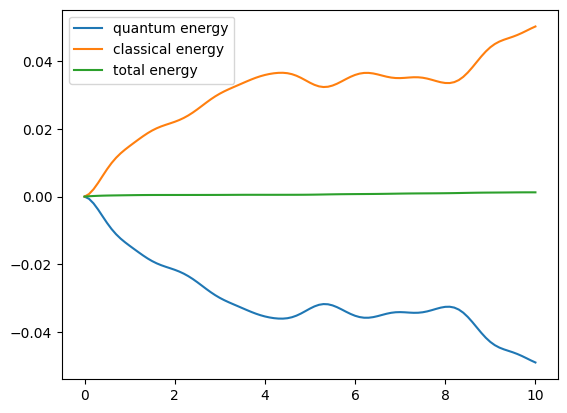

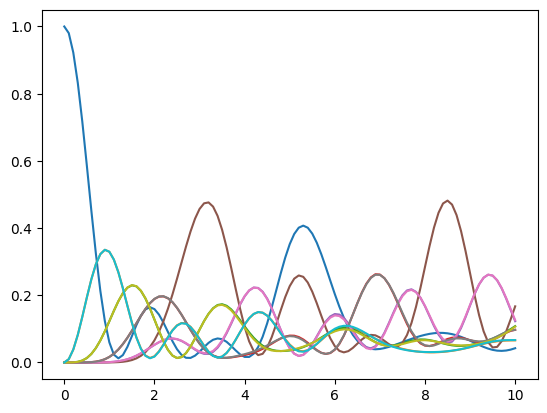

In [2]:
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))

import matplotlib.pyplot as plt
plt.plot(sim.settings.tdat_output, eq-eq[0], label='quantum energy')
plt.plot(sim.settings.tdat_output,ec-ec[0], label='classical energy') 
plt.plot(sim.settings.tdat_output,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(sim.settings.tdat_output,pops)
plt.show()

In [1]:
import numpy as np 
from qc_lab.algorithms import FewestSwitchesSurfaceHopping
from qc_lab.models import HolsteinLatticeModel
from qc_lab import Simulation
from qc_lab.dynamics import serial_driver


# simulation parameters 
simulation_parameters = dict(dt = 0.01, dt_output=0.01, tmax = 10, num_trajs = 1000, batch_size = 100)
sim = Simulation(simulation_parameters)
model_parameters = dict(N = 10, j = 1.0,w = 1.0, g = .1, periodic_boundary = True)
sim.model = HolsteinLatticeModel(model_parameters)
sim.algorithm = FewestSwitchesSurfaceHopping(dict(fssh_deterministic=True,num_branches=sim.model.constants.num_quantum_states))
sim.algorithm.settings.fssh_deterministic = False
#sim.algorithm.settings.num_branches = sim.model.settings.N


wf_db_0 = np.zeros(sim.model.constants.N) + 0.0j
wf_db_0[0] = 1.0+0.0j
sim.state.wf_db = wf_db_0

data = serial_driver(sim)

/home/akrotz/Research/pyMQC/qc_lab/algorithms/fewest_switches_surface_hopping.py:30: UserWarning: FSSH is using stochastic sampling, setting num_branches to 1.
  warnings.warn(
100%|██████████| 1001/1001 [00:04<00:00, 221.65it/s]


1000


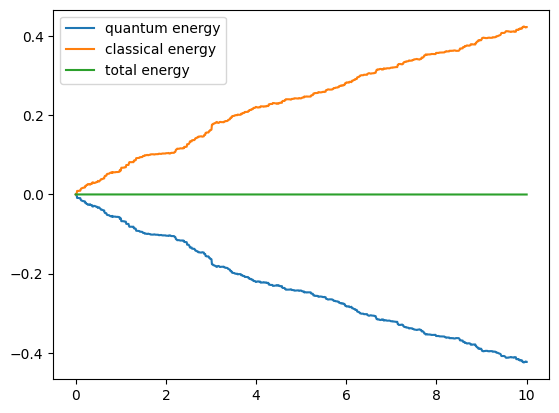

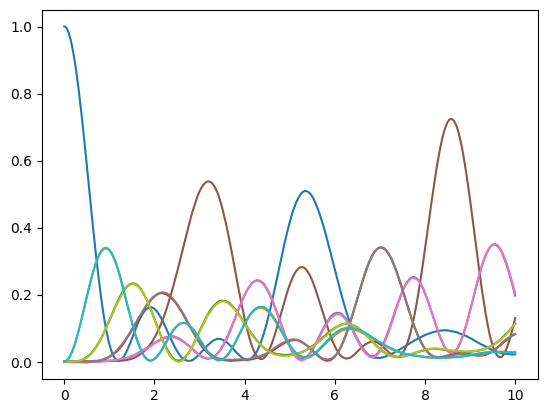

In [9]:
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))

import matplotlib.pyplot as plt
plt.plot(sim.settings.tdat_output, eq-eq[0], label='quantum energy')
plt.plot(sim.settings.tdat_output,ec-ec[0], label='classical energy') 
plt.plot(sim.settings.tdat_output,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(sim.settings.tdat_output,pops)
plt.show()

In [1]:
import numpy as np 
from qclab.algorithms import FewestSwitchesSurfaceHopping
from qclab.models import HolsteinLatticeModel
from qclab import Simulation
from qclab.dynamics import serial_driver


# simulation parameters 
simulation_parameters = dict(dt = 0.01, tmax = 10, num_trajs = 100, batch_size = 100)
sim = Simulation(simulation_parameters)
model_parameters = dict(N = 10, j = 1.0,w = 1.0, g = .2, periodic_boundary = True)
sim.model = HolsteinLatticeModel(model_parameters)
sim.algorithm = FewestSwitchesSurfaceHopping()
sim.algorithm.parameters.fssh_deterministic = True 
sim.algorithm.parameters.num_branches = sim.model.parameters.N


wf_db_0 = np.zeros(sim.model.parameters.N) + 0.0j
wf_db_0[0] = 1.0+0.0j
sim.state.add('wf_db', wf_db_0)

data = serial_driver(sim)

  0%|          | 0/1001 [00:00<?, ?it/s]/home/akrotz/Research/pyMQC/qclab/ingredients.py:211: UserWarning: Hop function excludes mass, check it
  warnings.warn("Hop function excludes mass, check it", UserWarning)
100%|██████████| 1001/1001 [00:51<00:00, 19.30it/s]


100


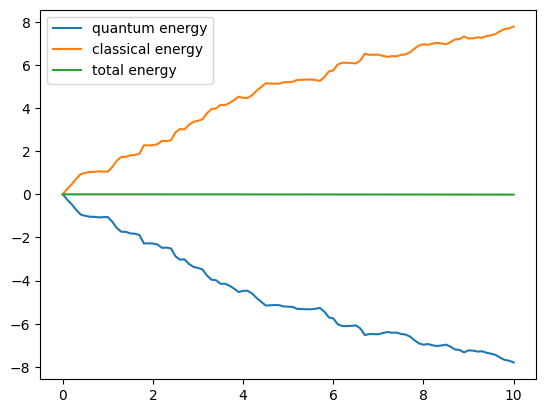

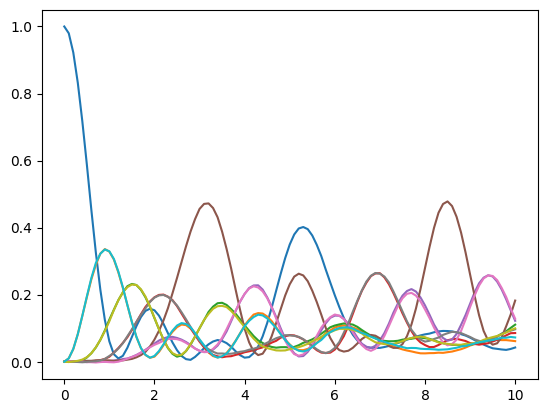

In [2]:
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))

import matplotlib.pyplot as plt
plt.plot(sim.parameters.tdat_output, eq-eq[0], label='quantum energy')
plt.plot(sim.parameters.tdat_output,ec-ec[0], label='classical energy') 
plt.plot(sim.parameters.tdat_output,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(sim.parameters.tdat_output,pops)
plt.show()